In [3]:
import pandas as pd
import numpy as np
import glob

In [4]:
from google.colab import files
uploaded = files.upload()

Saving 2015.csv to 2015 (1).csv
Saving 2016.csv to 2016 (1).csv
Saving 2017.csv to 2017 (1).csv
Saving 2018.csv to 2018 (1).csv


**통합전처리**

In [5]:
import pandas as pd

# 연도별 파일과 처리 함수 정의
def load_and_clean(year):
    df = pd.read_csv(f'{year}.csv')

    # 연도별 열 이름 통일 처리
    if year == 2015 or year == 2016:
        df = df.rename(columns={
            'Country': 'country',
            'Happiness Score': 'score',
            'Economy (GDP per Capita)': 'gdp_per_capita',
            'Family': 'social_support',
            'Health (Life Expectancy)': 'life_expectancy',
            'Freedom': 'freedom',
            'Trust (Government Corruption)': 'corruption',
            'Generosity': 'generosity',
            'Dystopia Residual': 'dystopia_residual',
        })
    elif year == 2017:
        df = df.rename(columns={
            'Country': 'country',
            'Happiness.Score': 'score',
            'Economy..GDP.per.Capita.': 'gdp_per_capita',
            'Family': 'social_support',
            'Health..Life.Expectancy.': 'life_expectancy',
            'Freedom': 'freedom',
            'Trust..Government.Corruption.': 'corruption',
            'Generosity': 'generosity',
            'Dystopia.Residual': 'dystopia_residual',
        })
    elif year == 2018:
        df = df.rename(columns={
            'Country or region': 'country',
            'Score': 'score',
            'GDP per capita': 'gdp_per_capita',
            'Social support': 'social_support',
            'Healthy life expectancy': 'life_expectancy',
            'Freedom to make life choices': 'freedom',
            'Perceptions of corruption': 'corruption',
            'Generosity': 'generosity',
        })
        # 2018은 Dystopia Residual이 없으므로 NaN 채우기
        df['dystopia_residual'] = None

    df['year'] = year

    # 필요한 열만 추리기
    selected_cols = [
        'country', 'year', 'score', 'gdp_per_capita', 'social_support',
        'life_expectancy', 'freedom', 'generosity', 'corruption', 'dystopia_residual'
    ]
    return df[selected_cols]

# 파일 통합
all_years = []
for year in [2015, 2016, 2017, 2018]:
    cleaned_df = load_and_clean(year)
    all_years.append(cleaned_df)

df_all = pd.concat(all_years, ignore_index=True)

# 결과 확인
df_all.head()


<ipython-input-5-1bbcc78efb3e>:61: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat(all_years, ignore_index=True)


,country,year,score,gdp_per_capita,social_support,life_expectancy,freedom,generosity,corruption,dystopia_residual
0,Switzerland,2015,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2.51738
1,Iceland,2015,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2.70201
2,Denmark,2015,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2.49204
3,Norway,2015,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2.46531
4,Canada,2015,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2.45176


In [6]:
df_all

,country,year,score,gdp_per_capita,social_support,life_expectancy,freedom,generosity,corruption,dystopia_residual
0,Switzerland,2015,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2.51738
1,Iceland,2015,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2.70201
2,Denmark,2015,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2.49204
3,Norway,2015,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2.46531
4,Canada,2015,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2.45176
...,...,...,...,...,...,...,...,...,...,...
621,Yemen,2018,3.355,0.44200,1.07300,0.34300,0.24400,0.08300,0.06400,NaN
622,Tanzania,2018,3.303,0.45500,0.99100,0.38100,0.48100,0.27000,0.09700,NaN
623,South Sudan,2018,3.254,0.33700,0.60800,0.17700,0.11200,0.22400,0.10600,NaN
624,Central African Republic,2018,3.083,0.02400,0.00000,0.01000,0.30500,0.21800,0.03800,NaN


**라벨링**

In [7]:
def label_by_year(group):
    group = group.sort_values(by='score', ascending=False).reset_index(drop=True)
    n = len(group)
    top_cutoff = int(n * 0.2)
    bottom_cutoff = int(n * 0.8)

    def label_index(idx):
        if idx < top_cutoff:
            return 2  # 행복한 국가
        elif idx >= bottom_cutoff:
            return 0  # 불행한 국가
        else:
            return 1  # 보통 국가

    group['label'] = group.index.map(label_index)
    return group

# 연도별로 라벨 부여
df_all = df_all.groupby('year', group_keys=False).apply(label_by_year)
df_all = df_all.reset_index(drop=True)

# 라벨 분포 확인
df_all['label'].value_counts().sort_index()


<ipython-input-7-d0bd550b033c>:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_all = df_all.groupby('year', group_keys=False).apply(label_by_year)


,count
label,
0,127
1,375
2,124


In [8]:
df_all

,country,year,score,gdp_per_capita,social_support,life_expectancy,freedom,generosity,corruption,dystopia_residual,label
0,Switzerland,2015,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2.51738,2
1,Iceland,2015,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2.70201,2
2,Denmark,2015,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2.49204,2
3,Norway,2015,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2.46531,2
4,Canada,2015,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2.45176,2
...,...,...,...,...,...,...,...,...,...,...,...
621,Yemen,2018,3.355,0.44200,1.07300,0.34300,0.24400,0.08300,0.06400,NaN,0
622,Tanzania,2018,3.303,0.45500,0.99100,0.38100,0.48100,0.27000,0.09700,NaN,0
623,South Sudan,2018,3.254,0.33700,0.60800,0.17700,0.11200,0.22400,0.10600,NaN,0
624,Central African Republic,2018,3.083,0.02400,0.00000,0.01000,0.30500,0.21800,0.03800,NaN,0


**데이터 분할**

In [9]:
from sklearn.model_selection import train_test_split

# Feature-Label 분리
X = df_all.drop(columns=['country', 'year', 'label', 'score'])
X = X.fillna(X.mean())
y = df_all['label']

# 학습/검증 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

**Random Forest (Baseline)**

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest 결과")
print(classification_report(y_test, y_pred_rf))

Random Forest 결과
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        26
           1       0.88      0.92      0.90        75
           2       0.88      0.88      0.88        25

    accuracy                           0.88       126
   macro avg       0.88      0.86      0.87       126
weighted avg       0.88      0.88      0.88       126



 **XGBoost**

In [11]:
!pip install xgboost --quiet

from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost 결과")
print(classification_report(y_test, y_pred_xgb))

XGBoost 결과
              precision    recall  f1-score   support

           0       0.95      0.77      0.85        26
           1       0.89      0.95      0.92        75
           2       0.88      0.88      0.88        25

    accuracy                           0.90       126
   macro avg       0.91      0.87      0.88       126
weighted avg       0.90      0.90      0.90       126



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:58:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


**Logistic Regression**

In [13]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression 결과")
print(classification_report(y_test, y_pred_lr))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression 결과
              precision    recall  f1-score   support

           0       0.96      0.88      0.92        26
           1       0.92      0.95      0.93        75
           2       0.88      0.88      0.88        25

    accuracy                           0.92       126
   macro avg       0.92      0.90      0.91       126
weighted avg       0.92      0.92      0.92       126



**Random Forest 피처 중요도 시각화**

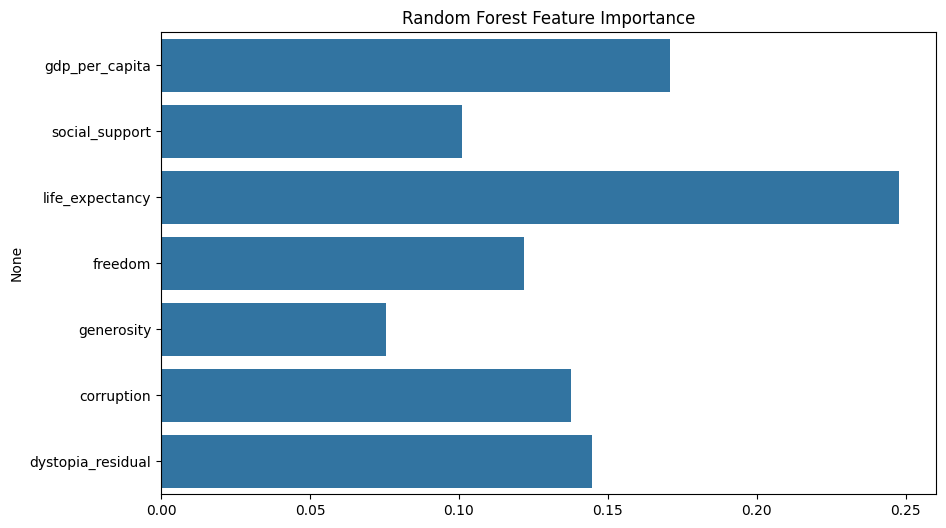

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest 기준 피처 중요도
importances = rf_model.feature_importances_
features = X.columns

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Random Forest Feature Importance")
plt.show()


**XGBoost 튜닝**

In [16]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# 튜닝된 XGBoost 모델 정의
xgb_model_tuned = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    learning_rate=0.05,
    max_depth=4,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# 학습
xgb_model_tuned.fit(X_train, y_train)

# 예측 및 평가
y_pred_xgb_tuned = xgb_model_tuned.predict(X_test)
print("튜닝된 XGBoost 성능")
print(classification_report(y_test, y_pred_xgb_tuned))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:01:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


튜닝된 XGBoost 성능
              precision    recall  f1-score   support

           0       0.95      0.77      0.85        26
           1       0.90      0.95      0.92        75
           2       0.88      0.92      0.90        25

    accuracy                           0.90       126
   macro avg       0.91      0.88      0.89       126
weighted avg       0.91      0.90      0.90       126



**Logistic Regression 계수 해석**

In [15]:
import pandas as pd

# 클래스별 계수 추출
coef_df = pd.DataFrame(
    lr_model.coef_,
    columns=X.columns,
    index=[f"Class {i}" for i in lr_model.classes_]
).T  # 행: feature, 열: 클래스별 계수

# 계수 큰 순으로 정렬해서 확인
coef_df_sorted = coef_df.sort_values(by="Class 2", ascending=False)
coef_df_sorted


,Class 0,Class 1,Class 2
gdp_per_capita,-2.984865,-0.038861,3.023727
dystopia_residual,-2.725167,-0.005145,2.730313
life_expectancy,-2.717111,0.134778,2.582332
social_support,-2.340632,-0.185950,2.526581
freedom,-2.196661,-0.152951,2.349612
generosity,-1.792825,0.077126,1.715699
corruption,-0.163259,-1.524314,1.687572


**교차검증**

In [17]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# 교차검증 설정 (5-fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 모델 정의
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(
        objective='multi:softmax',
        num_class=3,
        learning_rate=0.05,
        max_depth=4,
        n_estimators=200,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        use_label_encoder=False,
        eval_metric='mlogloss'
    ),
    "Logistic Regression": LogisticRegression(
        multi_class='multinomial',
        solver='lbfgs',
        max_iter=1000,
        random_state=42
    )
}

# 결과 출력
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f"{name} 평균 정확도: {scores.mean():.4f} (+/- {scores.std():.4f})")


Random Forest 평균 정확도: 0.8562 (+/- 0.0170)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:27:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:27:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:27:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:27:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:27:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost 평균 정확도: 0.8674 (+/- 0.0174)
Logistic Regression 평균 정확도: 0.9042 (+/- 0.0218)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi